In [125]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression



df = pd.read_csv('flight-data.csv')
df.head(3)

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

In [127]:
df.shape

(10000, 25)

In [128]:
df.isnull().sum()

carrier            0
flight             0
tailnum           74
origin             0
dest               0
air_time         284
distance           0
hour               0
minute             0
temp              48
dewp              48
humid             48
wind_dir         269
wind_speed        49
wind_gust       7613
precip            46
pressure        1192
visib             46
type            1501
manufacturer    1501
model           1501
engines         1501
seats           1501
engine          1501
arr_delay        284
dtype: int64

In [129]:
drop_col = ['tailnum','origin', 'dest','manufacturer','wind_gust','type','model','type', 'carrier','engine','seats']
df = df.drop(drop_col, axis =1 )

In [130]:
df.columns

Index(['flight', 'air_time', 'distance', 'hour', 'minute', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'precip', 'pressure', 'visib',
       'engines', 'arr_delay'],
      dtype='object')

In [131]:
df.describe()

,flight,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,precip,pressure,visib,engines,arr_delay
count,10000.000000,9716.000000,10000.000000,10000.000000,10000.000000,9952.000000,9952.000000,9952.000000,9731.000000,9951.000000,9954.000000,8808.000000,9954.000000,8499.000000,9716.000000
mean,1993.785200,149.771099,1033.036700,13.185300,26.405800,56.885289,41.578652,59.699401,199.824273,11.082228,0.004574,1017.805722,9.237887,1.993293,0.410045
std,1637.565161,92.714630,722.747763,4.691094,19.286677,17.967138,19.360524,19.713338,106.234823,5.635370,0.033679,7.545151,2.043394,0.097400,0.491867
min,1.000000,21.000000,80.000000,5.000000,0.000000,10.940000,-9.040000,12.740000,0.000000,0.000000,0.000000,985.000000,0.060000,1.000000,0.000000
25%,580.750000,81.000000,502.000000,9.000000,9.000000,42.080000,26.060000,43.920000,120.000000,6.904680,0.000000,1012.700000,10.000000,2.000000,0.000000
50%,1511.000000,130.000000,872.000000,13.000000,29.000000,57.020000,42.800000,57.990000,220.000000,10.357020,0.000000,1017.500000,10.000000,2.000000,0.000000
75%,3514.250000,191.000000,1389.000000,17.000000,45.000000,71.960000,57.920000,75.690000,290.000000,14.960140,0.000000,1022.700000,10.000000,2.000000,1.000000
max,6181.000000,648.000000,4983.000000,23.000000,59.000000,100.040000,78.080000,100.000000,360.000000,42.578860,1.210000,1042.100000,10.000000,4.000000,1.000000


In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
flight,10000.0,1993.785200,1637.565161,1.00,580.75000,1511.00000,3514.25000,6181.00000
air_time,9716.0,149.771099,92.714630,21.00,81.00000,130.00000,191.00000,648.00000
distance,10000.0,1033.036700,722.747763,80.00,502.00000,872.00000,1389.00000,4983.00000
hour,10000.0,13.185300,4.691094,5.00,9.00000,13.00000,17.00000,23.00000
minute,10000.0,26.405800,19.286677,0.00,9.00000,29.00000,45.00000,59.00000
temp,9952.0,56.885289,17.967138,10.94,42.08000,57.02000,71.96000,100.04000
dewp,9952.0,41.578652,19.360524,-9.04,26.06000,42.80000,57.92000,78.08000
humid,9952.0,59.699401,19.713338,12.74,43.92000,57.99000,75.69000,100.00000
wind_dir,9731.0,199.824273,106.234823,0.00,120.00000,220.00000,290.00000,360.00000
wind_speed,9951.0,11.082228,5.635370,0.00,6.90468,10.35702,14.96014,42.57886


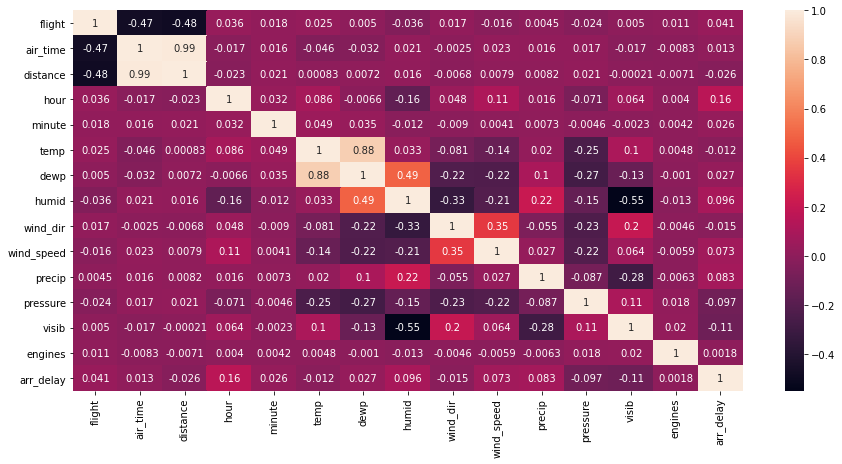

In [133]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot =True)
plt.show()

In [134]:
df.isna().sum().sum()

3815

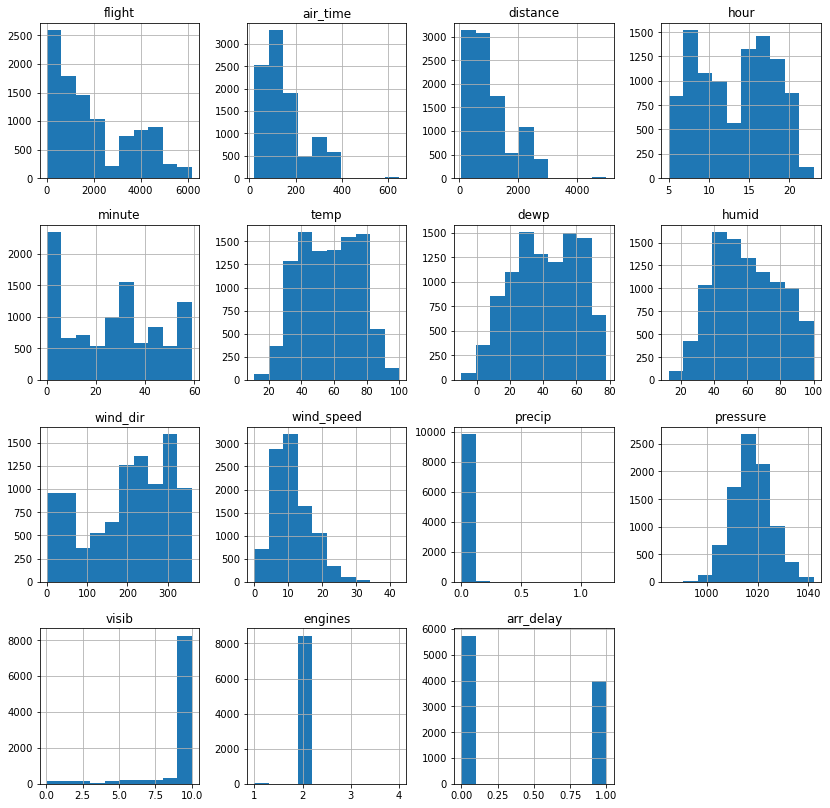

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(14,14))
plt.show()


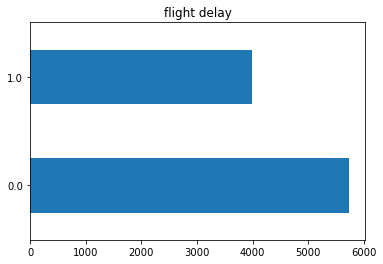

In [136]:
df.arr_delay.value_counts().plot.barh()
plt.title('flight delay')
plt.show()

In [137]:
df.fillna(999, inplace=True)

In [138]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)


fNames = df.columns[:-1]
X_train, X_test, y_train, y_test = train_test_split(df[fNames], df['arr_delay'],
                                                             test_size=0.20,
                                                          random_state = 50
                                                            )

print(f'Training samples: {X_train.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 8000
Test samples: 2000


In [139]:
print(f'Training sample: {y_train.shape[0]:,}')
print(f'Test sample: {y_test.shape[0]:,}')

Training sample: 8,000
Test sample: 2,000


In [140]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
  
def generate_estimates(x, y):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)




In [141]:
m = generate_estimates(X_train, y_train)
m

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty='none'))])

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(use_pca = False, comp=None):
    if use_pca:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('pca', PCA(n_components=comp)),
             ('model', LogisticRegression(penalty='none'))
            ]
        )
    else:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression(penalty='none'))
            ]
        )

    return modeling_pipeline

m_rawFeatures = generate_estimates(use_pca=False).fit(X_train, y_train)
print(m_rawFeatures)

m_pca_models = {}
for i in range(1,6):
    m_pca_models[i] = generate_estimates(use_pca=True, comp=i).fit(X_train, y_train)
    print(m_pca_models[i])
    
print('Models fitted')

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=1)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=3)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=4)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty='none'))])
Models fitted


In [143]:
from sklearn.metrics import confusion_matrix

y_test_pred = m.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[983 164   7]
 [560 207   6]
 [  5   6  62]]


In [144]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

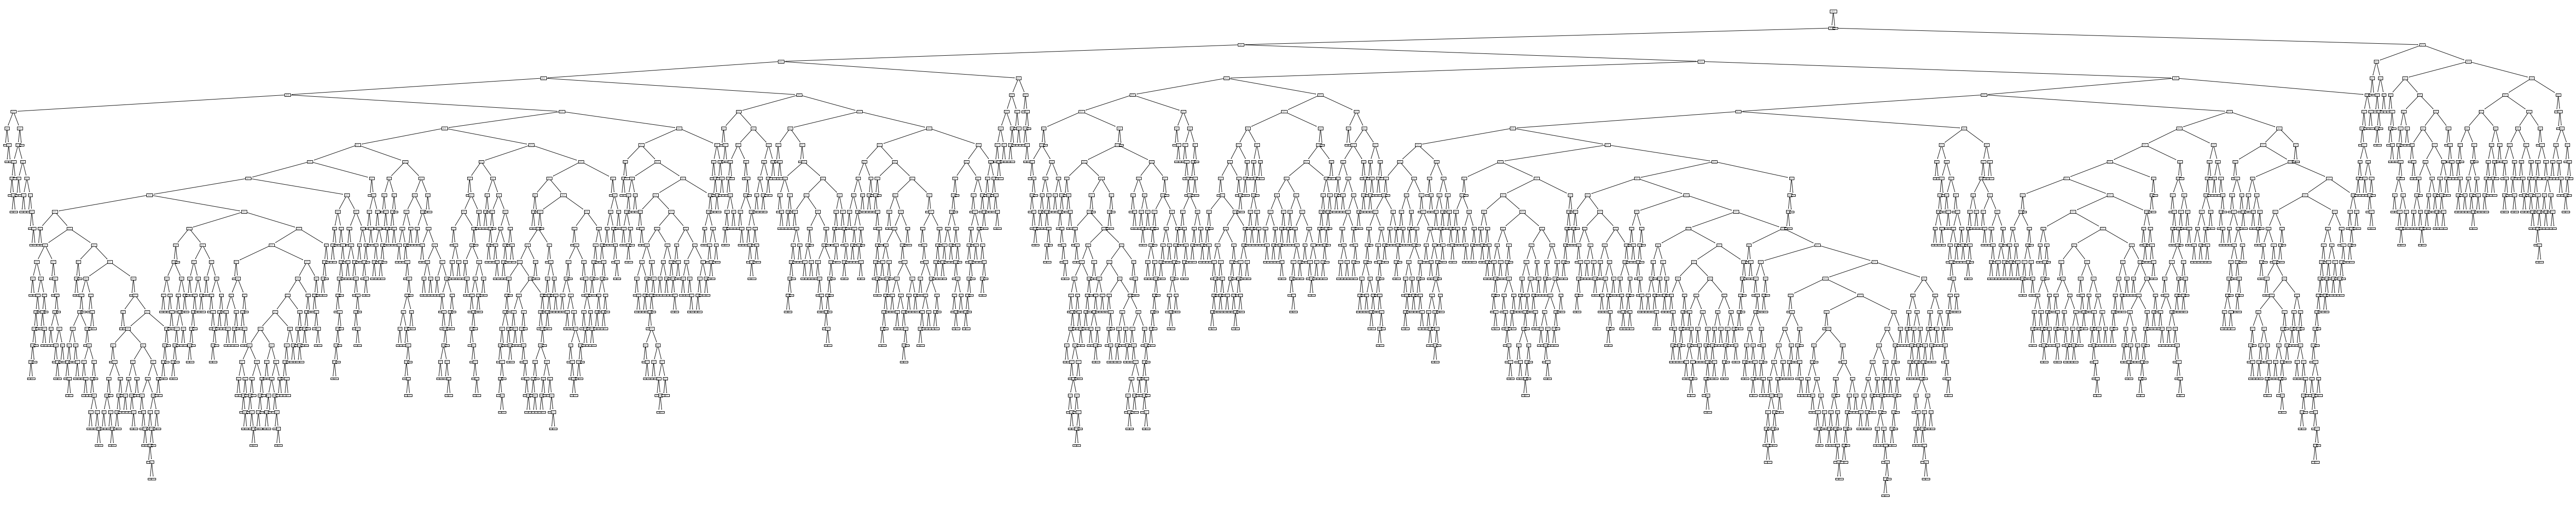

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', random_state=1)
tree_model.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize=(100,20))
tree.plot_tree(tree_model)
plt.show()

In [145]:
print(f'Training accuracy: {tree_model.score(X_train, y_train):.2f}')
print(f'Test accuracy: {tree_model.score(X_test, y_test):.2f}')

Training accuracy: 1.00
Test accuracy: 0.61


In [146]:
tree_model.predict_proba(X_test)[:10, :]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [147]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def generate_estimates():
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('model', LinearRegression())
        ]
    )

    return modeling_pipeline

from sklearn.model_selection import cross_validate

reg = generate_estimates()
cv_results = cross_validate(reg, X_test, y_test, scoring=['r2'], cv=10)
cv_results

{'fit_time': array([0.02070403, 0.00625014, 0.0061121 , 0.00644302, 0.00534296,
        0.0035131 , 0.00385213, 0.00361395, 0.0030899 , 0.00279665]),
 'score_time': array([0.00262094, 0.00174618, 0.00266194, 0.00178409, 0.00174403,
        0.00120592, 0.00119495, 0.00128007, 0.00105309, 0.00103331]),
 'test_r2': array([0.98065987, 0.99206001, 0.98139086, 0.96826036, 0.99325333,
        0.99005741, 0.99329768, 0.98708653, 0.99148069, 0.98261723])}

In [148]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def generate_estimates():
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('model', LinearRegression())
        ]
    )

    return modeling_pipeline

from sklearn.model_selection import cross_validate

reg = generate_estimates()
cv_results = cross_validate(reg, X_train, y_train, scoring=['r2'], cv=10)
cv_results

{'fit_time': array([0.01542139, 0.00738406, 0.00650287, 0.00698805, 0.00677705,
        0.00494313, 0.00469089, 0.00499892, 0.00450921, 0.00389218]),
 'score_time': array([0.00327492, 0.00190902, 0.00164986, 0.0018177 , 0.00172591,
        0.00122309, 0.00117707, 0.00114322, 0.00108981, 0.00103593]),
 'test_r2': array([0.98587683, 0.98497859, 0.98149428, 0.98877145, 0.9913492 ,
        0.98874398, 0.98451611, 0.98661302, 0.97997796, 0.98730823])}

In [154]:

nums = df.dtypes[df.dtypes != 'object'].index.tolist()

cats = df.dtypes[df.dtypes == 'object'].index.tolist()
cats = [x for x in cats if x not in ['Churn', 'customerID']]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, nums),
                                                      ('create_dummies', cat_pipeline, cats)])

print('Pipeline Created')

Pipeline Created


In [149]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )


from sklearn.model_selection import GridSearchCV

param_grid = [
  {'logreg__C': [1, 10, 100, 1000], 'pca__n_components': [1,2,3,4,5,10,15]}
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_test, y_test)

In [150]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [151]:
gcv_results.best_score_

0.689

In [152]:
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
tree = tree.fit(X_train, y_train)
tree_train_predict = tree.predict(X_train)
tree_test_predict = tree.predict(X_test)

tree_train_score = accuracy_score(y_train, tree_train_predict)
tree_test_score = accuracy_score(y_test, tree_test_predict)

print(f'Tree Training Score: {tree_train_score:.2%}')
print(f'Tree Test Score: {tree_test_score:.2%}')

Tree Training Score: 59.86%
Tree Test Score: 61.35%


In [153]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=tree, n_estimators=200, learning_rate=0.9, random_state=20)
ada = ada.fit(X_train.values, y_train)
ada_train_predict = ada.predict(X_train.values)
ada_test_predict = ada.predict(X_test.values)

ada_train_score = accuracy_score(y_train, ada_train_predict)
ada_test_score = accuracy_score(y_test, ada_test_predict)

print(f'AdaBoost Training Score: {ada_train_score:.2%}')
print(f'AdaBoost Test Score: {ada_test_score:.2%}')

AdaBoost Training Score: 53.35%
AdaBoost Test Score: 54.85%
